<a href="https://colab.research.google.com/github/anacaro-angel/connectatel_analysis/blob/main/ConnectaTel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [ ]:
plans.head(5) # mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
users.head(5)# mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
usage.head(5) # mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
plans.info() # inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
users.info() # inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
usage.info() # inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print(users.isna().sum()) # Cantidad de valores nulos)
print(users.isna().mean()) # Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:
# cantidad de nulos para usage
print(usage.isna().sum()) # Cantidad de valores nulos)
print(usage.isna().mean()) # Proporción de valores nulos)

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?


---


❗ **Diagnóstico final del bloque**
<br><br>
***Dataframe "users":***
<br>
1. Para los valores nulos de `city` los imputaría como una categoría "unknown" con el objetivo de mantener el resto de la información sin perder filas porque se perderían el 12% de los datos. <br>
2.
En el caso de `churn` tenemos el 88% por lo que no es conveniente eliminar ni imputar ya que esto representa que el usuario no ha abandona el servicio. Una opción sería tratarlo como una variable de dos valore: sí (1) o no (2).

***Dataframe "usage":***
<br>
1. En el caso de `date` es menos del 1% de información faltante por lo que se puede eliminar sin crear sesgo.
2. Para `duration` y `length` revisaría la relación que hay con type para ver si se refiere a llamadas o sms y aplicar de acuerdo con la naturaleza de cada tipo.



### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users

print("Resumen estadístico - User")
print(users.describe())


Resumen estadístico - User
            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000


- La columna `user_id` la media y la mediana son similares por lo que representa una distribución uniforme.
-  La columna `age` el valor mínimo marca -999 lo que habla de un dato invalido lo que distorciona la media (33 años) de la mediana (47 años).

In [ ]:
# explorar columnas numéricas de usage
print("Resumen estadístico - Usage")
print(usage.describe())

Resumen estadístico - Usage
                id       user_id      duration        length
count  40000.00000  40000.000000  17924.000000  22104.000000
mean   20000.50000  12002.405975      5.202237     52.127398
std    11547.14972   1157.279564      6.842701     56.611183
min        1.00000  10000.000000      0.000000      0.000000
25%    10000.75000  10996.000000      1.437500     37.000000
50%    20000.50000  12013.000000      3.500000     50.000000
75%    30000.25000  13005.000000      6.990000     64.000000
max    40000.00000  13999.000000    120.000000   1490.000000


- Las columnas `id` y `user_id`para ambas la media y mediana son cercanas por lo que muestra una distribución uniforme, estas columnas son identificadoras de usuarios.
- Las columnas `duration` y `lenght` como vimos tienen valores faltantes que se deben trabajar, sin embargo, en leghtn la media y mediana son más cercanas.

In [ ]:
# explorar columnas categóricas de users

columnas_user = ['city', 'plan']
print("Resumen categórico - Users")
print(users[columnas_user].describe())


Resumen categórico - Users
          city    plan
count     3531    4000
unique       7       2
top     Bogotá  Basico
freq       808    2595


- La columna `city` tiene valores faltantes, nos indica 7 ciudades diferentes sindo Bogatá la ciudad top con una frecuencia de 808 registros.
- La columna `plan` no tiene valores nulos, nos muestra dos tipos de planes y el más frecuente es el básico con 2595 registros.

In [ ]:
# explorar columna categórica de usage
columna_usage=['type'] # completa el código
print("Resumen categórico - Usage")
print(usage[columna_usage].describe())

Resumen categórico - Usage
         type
count   40000
unique      2
top      text
freq    22092


- La columna `type` no contiene valores nulos, nos indica dos tipos de servicio que pueden ser llamadas y texto, éste último es el más frecuente con 22092 registros (más del 50%).


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

---

❗ **Diagnóstico final del bloque**

**Valores inválidos o sentinels**
<br>
- ¿En qué columnas encontraste valores inválidos o sentinels?
- ¿Qué acción tomarías?  
*El dato inválido que más llama mi atención es la edad -999 en el df de users por lo que se debe imputar con la mediana ya que el promedio está afectado justo por estos datos. Para el resto de información hay que revisar como manejar los valores faltantes caso por caso para evitar sesgo.*


### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users["reg_date"])# completa el código
print(users["reg_date"].dtype)

datetime64[ns]


In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage["date"]) # completa el código
print(usage["date"].dtype)

datetime64[ns]


In [ ]:
# Revisar los años presentes en `reg_date` de users
print(users["reg_date"].dt.year.value_counts())

2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64


En `reg_date` se tienen 40 registros para 2026 que no se deben de considerar ya que solo se cuenta con información hasta el 2024.

In [ ]:
# Revisar los años presentes en `date` de usage
print(usage["date"].dt.year.value_counts())

2024.0    39950
Name: date, dtype: int64


En `date`, solo se tienen registros del año 2024 y los 50 datos faltantes coinciden con la exploración que habíamos hecho anteriormente del Dataframe.
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

---

❗ **Diagnóstico final del bloque**
<br><br>
**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
*Aparecen años sin transcurrir como el 2026 en users, así como años pasados 2022 y 2023.*
- ¿Qué harías con ellas?
*Considerando que en la df de usage solo viene información del 2024, solamente tomaría los registros correspondientes a este año para poder matchear la información entre df.*

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users["age"].median()
users["age"] = users["age"].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users["city"] = users["city"].replace("?", "NA")

# Verificar cambios
print("Ciudades con sentinel ?:", (users["city"] == "?").sum())
users["city"].describe()

Ciudades con sentinel ?: 0


count       3531
unique         7
top       Bogotá
freq         808
Name: city, dtype: object

In [ ]:
# Marcar fechas futuras como NA para reg_date
users.loc[users["reg_date"].dt.year == 2026, "reg_date"] = pd.NaT

# Verificar cambios
print("Fechas con año 2026:", (users["reg_date"].dt.year == 2026).sum())
users["reg_date"].describe()

Fechas con año 2026: 0


count                              3960
unique                             3960
top       2024-06-27 06:08:22.325581392
freq                                  1
first               2022-01-01 00:00:00
last                2024-12-31 00:00:00
Name: reg_date, dtype: object

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
usage["duration_null"] = usage["duration"].isna()
print(usage.groupby("type")["duration_null"].mean())


type
call    0.000000
text    0.999276
Name: duration_null, dtype: float64


In [ ]:
# Verificación MAR en usage (Missing At Random) para length
usage["length_null"] = usage["length"].isna()
print(usage.groupby("type")["length_null"].mean())


type
call    0.99933
text    0.00000
Name: length_null, dtype: float64


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

❗ **Diagnóstico final del bloque**<br>
*Con base en los resultados, se observa que los valores nulos sí dependen de `type` por lo que se consideran MAR. Es decir, en `duration` no hay nulos para los registros de llamadas, mientras que para `length` no hay nulos en registros de texto.*

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg({
    "is_text": "sum",
    "is_call": "sum",
    "duration": "sum"
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "duration": "cant_minutos_llamada"
})

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
print("Resumen estadístico - User profile")
print(user_profile.describe())

Resumen estadístico - User profile
            user_id          age  cant_mensajes  cant_llamadas  \
count   4000.000000  4000.000000    3999.000000    3999.000000   
mean   11999.500000    48.122250       5.524381       4.478120   
std     1154.844867    17.690408       2.358416       2.144238   
min    10000.000000    18.000000       0.000000       0.000000   
25%    10999.750000    33.000000       4.000000       3.000000   
50%    11999.500000    47.000000       5.000000       4.000000   
75%    12999.250000    63.000000       7.000000       6.000000   
max    13999.000000    79.000000      17.000000      15.000000   

       cant_minutos_llamada  
count           3999.000000  
mean              23.317054  
std               18.168095  
min                0.000000  
25%               11.120000  
50%               19.780000  
75%               31.415000  
max              155.690000  


In [ ]:
# Distribución porcentual del tipo de plan
columna_user_profile = ['plan']
print("Resumen categórico por plan - User profile")
print(user_profile["plan"].value_counts(normalize=True)*100)

Resumen categórico por plan - User profile
Basico     64.875
Premium    35.125
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

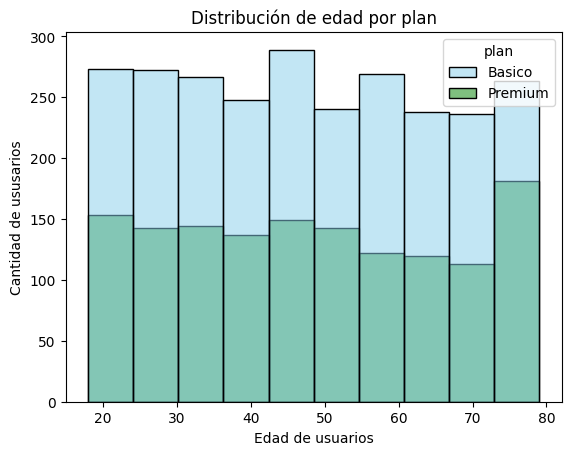

In [ ]:
# Histograma para visualizar la edad (age)

sns.histplot(data=user_profile, x="age", bins=10, hue="plan", palette={"Basico": "skyblue", "Premium": "green"}, edgecolor="black")
plt.xlabel("Edad de usuarios")
plt.ylabel("Cantidad de ususarios")
plt.title("Distribución de edad por plan")
plt.show()


💡Insights:
- Distribución se mantiene proporcionada, sin embargo esiste un pico dominante alredodr de los 47 años, considerando el tratamiento de los datos que se hizo con la mediana. En cuanto al plan, se observa que el básico es el que tienen mayor frecuencia y tampoco se observa una acumulación por edad para el plan premium.

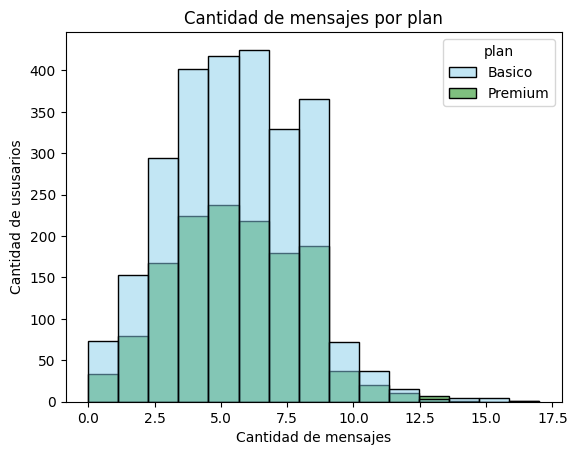

In [ ]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x="cant_mensajes", bins=15, hue="plan", palette={"Basico": "skyblue", "Premium": "green"}, edgecolor="black")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Cantidad de ususarios")
plt.title("Cantidad de mensajes por plan")
plt.show()


💡Insights:
- La mayor cantidad de mensajes se concentra entre 2 a 9 mensjaes con un pico mayor en 6 mensajes, lo que nos muestra que el envío de mensajes se encuentra dentro de un rango bajo. En cuanto a los planes el básico sigue teniendo mayor presencia vs el premium, lo que nos muestra que no hay una relación definida entre la cantidad de mensajes y el plan.

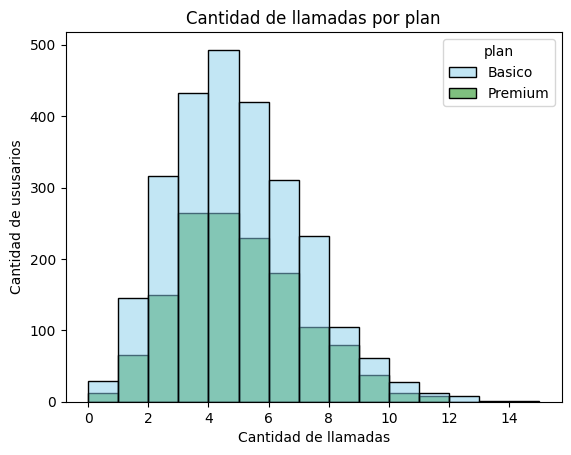

In [ ]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x="cant_llamadas", bins=15, hue="plan", palette={"Basico": "skyblue", "Premium": "green"}, edgecolor="black")
plt.xlabel("Cantidad de llamadas")
plt.ylabel("Cantidad de ususarios")
plt.title("Cantidad de llamadas por plan")
plt.show()

💡Insights:
- La mayor concentración de llamadas se encuentra entre 4 y 5 por lo que también indica un uso moderado de llamadas. Igualmente se observa que el plan básico es quien tiene más usuarios para llamadas. Con esto habría que revisar que tipo de beneficios mueve a los usuarios premium para no perder ese mercado.

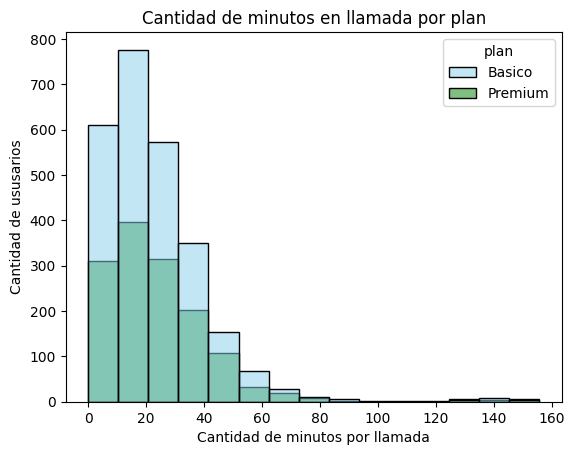

In [ ]:
# Histograma para visualizar la cant_minutos_llamada

sns.histplot(data=user_profile, x="cant_minutos_llamada", bins=15, hue="plan", palette={"Basico": "skyblue", "Premium": "green"}, edgecolor="black")
plt.xlabel("Cantidad de minutos por llamada")
plt.ylabel("Cantidad de ususarios")
plt.title("Cantidad de minutos en llamada por plan")
plt.show()


💡Insights:
- Se observa que la mayoría de usuarios hacen llamadas cortas con un pico marcado entre 10 a 20 minutos, también se ve que a patir de los 40 minutos la cantidad de usuarios disminuye drásticamente. Sin embargo, tenemos usuarios que hacen llamadas de más de 140 minutos en los que podríamos enfocar algún tipo de campaña promocional. También se vuelve a observar mayor presencia de usuarios con plan básico, sin embargo los usuarios premium tienen más presencia en las llamadas de más de 40 minutos.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

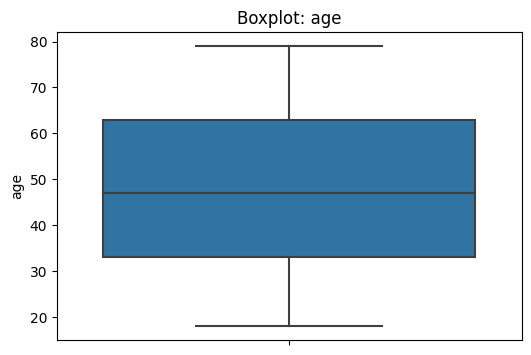

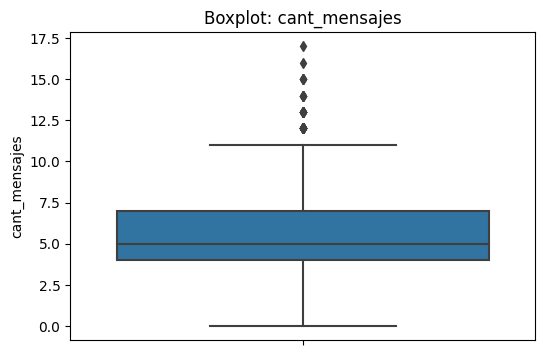

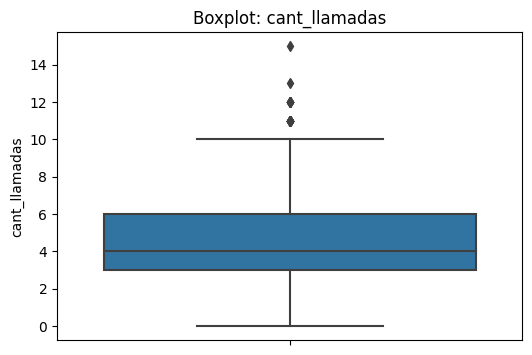

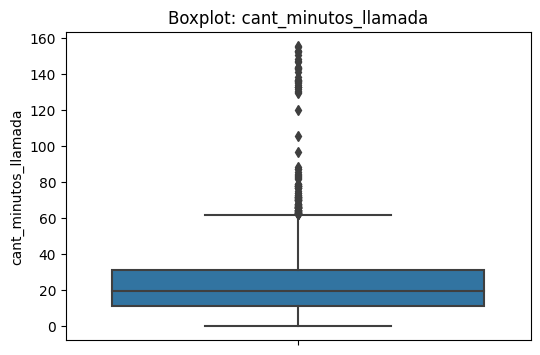

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=user_profile, y=col)
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col)
    plt.show()


💡Insights:
- **Age:** no hay outliers visibles, el rango de edad va aprox entre 20 a 80 años, la mayoría de los usuarios son adultos con pocos usuarios a los extremos inferior (infantil) y superior (mayores).<br>
- **cant_mensajes:** el IQR va de 3 a 7.5, por lo que se observa un uso moderado de la mensajería. Existen outliers superiores, es decir que mandan entre 12 y 17 mensajes que esta por encima del límite superior de 11.5.
- **cant_llamadas:** el IQR va de 2 a 6 llamadas y la media está en 4, igualmente se observa un uso moderado para las llamadas. Hay outliers que van de 11 a 14 llamadas por encima del límite superior de 10.5.
- **cant_minutos_llamada:** se observa que las llamadas van de 0 hasta 160 minutos lo que hace referencia a una mayor dispersión, la mediana esta entre 15 y 20 minutos por lo que la mayoría de los usuarios hacen llamadas cortas. Existen outliers superiores que van de los 60 a los 160 minutos por encima del límite superior de 62 minutos.

In [ ]:
# Calcular límites con el método IQR
user_profile = user_profile.dropna(subset=["cant_mensajes", "cant_llamadas"])
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col in columnas_limites:
    Q1=user_profile[col].quantile(0.25)
    Q3=user_profile[col].quantile(0.75)
    IQR=Q3-Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    print(f"\nLímites para {col}:")
    print(f" Inferior: {lower:.2f}")
    print(f" Superior: {upper:.2f}")

    outliers = user_profile[(user_profile[col] < lower) | (user_profile[col] > upper)]
    print(f" Total de outliers: {len(outliers)}")





Límites para cant_mensajes:
 Inferior: -0.50
 Superior: 11.50
 Total de outliers: 46

Límites para cant_llamadas:
 Inferior: -1.50
 Superior: 10.50
 Total de outliers: 30

Límites para cant_minutos_llamada:
 Inferior: -19.32
 Superior: 61.86
 Total de outliers: 109


In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights:
- **cant_mensajes:** la cantidad de outlier representa el 1.15%, **los mantendría** para analizar un compartamiento en donde se hace mayor uso de la mensajería y diseñar estrategías para consumidores heavy. Adicional el máximo es 17 mensajes y el límite superior es de 11.5 no hay una diferencia con un valor extremo
- **cant_llamadas:** la cantidad de outlier representa el 0.75% lo que hace referencia a ser casos reales, **los mantendría** para analizar un compartamiento en donde se hace mayor uso de las llamadas y diseñar estrategías para consumidores heavy. No distorsiona el análisis general.
- **cant_minutos_llamada:** la cantidad de outliers representa el 2.7% lo cual no parece significativo, sin embargo, por los valores tan alejados de la media yo haría winzorización para evitar distorsión en el análisis.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
def clasificar_uso(row):
    if row["cant_llamadas"]<5 and row["cant_mensajes"]<5:
        return "Bajo uso"
    elif row["cant_llamadas"]<10 and row["cant_mensajes"]<10:
        return "Uso medio"
    else:
        return "Alto uso"

user_profile["grupo_uso"] = user_profile.apply(clasificar_uso, axis=1)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
def clasificar_edad(row):
    if row["age"] < 30:
        return "Joven"
    elif row["age"] < 60:
        return "Adulto"
    else: return "Adulto Mayor"

user_profile["grupo_edad"] = user_profile.apply(clasificar_edad, axis=1)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

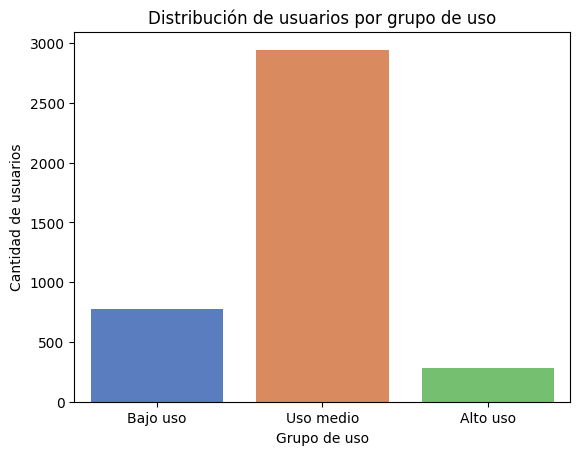

In [ ]:
# Visualización de los segmentos por uso
order=["Bajo uso", "Uso medio", "Alto uso"]
sns.countplot(data=user_profile, x="grupo_uso", palette="muted", order=order)
plt.xlabel("Grupo de uso")
plt.ylabel("Cantidad de usuarios")
plt.title("Distribución de usuarios por grupo de uso")
plt.show()

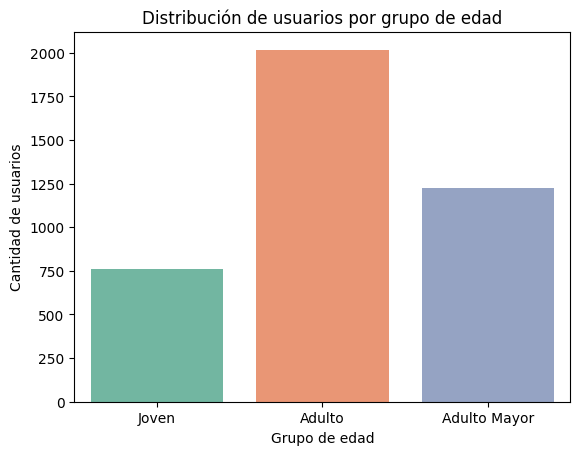

In [ ]:
# Visualización de los segmentos por edad
order=["Joven", "Adulto", "Adulto Mayor"]
sns.countplot(data=user_profile, x="grupo_edad", palette="Set2", order=order)
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de usuarios")
plt.title("Distribución de usuarios por grupo de edad")
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos** <br>

- **Valores nulos:** <br>
**df `users`**
1. Para `city` los valores representan el 12% por lo que se pueden inputar con una categoría "unknown" con el objetivo de mantener el resto de la información sin perder filas.
2. En el caso de `churn` se tiene el 88% por lo que no es conveniente eliminar ni imputar ya que esto representa que el usuario no ha abandona el servicio. Una opción sería tratarlo como una variable de dos valore: sí (1) o no (2).<br>
**df `usage`**
4. En el caso de `date` es menos del 1% de información faltante por lo que se puede eliminar sin crear sesgo.
2. Para `duration` y `length` revisaría la relación que hay con type para ver si se refiere a llamadas o sms y aplicar de acuerdo con la naturaleza de cada tipo.

- **Valores inválidos:** <br>
En la columna `age` del df `users` se trabajó con datos inválidos como -999 que se imputo utilizando la mediana.

- **Outliers:** <br>
En la unión del df `user_profile` se econtrarons outliers para las columnas:
1. `cant_mensajes`: 46 outliers (1.15%) KEEP
2. `cant_llamadas`: 30 outliers (0.75%) KEEP
3. `cant_minutos_llamadas`: 109 outliers (2.7%) CAP
<br>

🔍 **Segmentos por Edad**<br>
En términos de edad se tienen definieron tres rangos:
1. Joven: en este bloque se tiene un uso de bajo a medio.
2. Adulto: dentro de esta categoría se encuentra la mediana y la mayor concentración de usuarios.
3. Adulto Mayor: los usuarios en esta categoría tienen un uso medio y el tipo de servicio que más usan son las llamadas.
<br>

📊 **Segmentos por Nivel de Uso**<br>
Consideran ambos servicios llamadas y textos se tuvieron los siguientes resultados por nivel de uso:
1. Bajo uso: menos de 5 llamadas.
2. Uso medio: más de 5 llamadas y menos de 10.
3. Alto uso: más de 10 llamadas.
De acuerdo con esta categoría la mayor concentración de usuarios se encuentra en un uso medio.
<br>


➡️ **Esto sugiere que ...**
1. El rango de edad con mayor uso de servicios de llamada y mensaje es de 40 a 60 años posiblemente por tener una mayor estabilidad económica y con posibilidades de contratar planes más robustos.
2. El plan que tiene mayor cantidad de usuarios es el básico.
3. La cantidad de outliers nos habla de un grupo pequeño de usuarios de alto uso.
<br>

💡 **Recomendaciones**
1. Trabajar en un plan económico de bajo uso para llegar a los segmentos de la población más jovénes.
2. En cuanto al plan premuim se pueden trabajar en compensaciones diferentes a minutos y textos para atraer mayor cantidad de usuarios.
3. Para los usuarios que se salen de las métricas con un mayor consumo de textos y minutos de llamada se pueden crear un paquete de beneficios adicionales.
4. Hacer campañas personalizadas de acuerdo a los segmentos de uso para los de menor uso que son los jovenes, mayor cantidad de megas para redes sociales, para los de uso medio promociones para migrar a planes Premium y a los de alto uso recompensas por fidelidad.
   